In [1]:
import os
from getpass import getpass
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from time import sleep
import pyautogui
import requests
import json
import threading
import shutil
from pygame import mixer
import cv2

pygame 2.6.1 (SDL 2.28.4, Python 3.13.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
options = Options()
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)


In [81]:
#Function to download all the pokemon icons and save it locally to appropriate folder

def download_pokemon_icons():
    
    options = Options()
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)
    wait = WebDriverWait(driver, 20)
    driver.get(f'https://wiki.pokemon-vortex.com/wiki/Bulbasaur') #Link to the first pokemon in the pokedex

    pokemon = '' 

    pokedex = {}  

    id = 1 
    
    while not pokemon == 'Bulbusaur': #Looped pokedex back to Bulbasaur

        

        try:
            
            
            wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "#firstHeading > span")))
            pokemon = driver.find_element(By.CSS_SELECTOR, "#firstHeading > span").text
            
            wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "#section-collapsible-0 > div:nth-child(2) > table > tbody > tr:nth-child(2) > td > span:nth-child(1) > a > img"))) 
            poke_icon_link = driver.find_element(By.CSS_SELECTOR, "#section-collapsible-0 > div:nth-child(2) > table > tbody > tr:nth-child(2) > td > span:nth-child(1) > a > img").get_attribute("src")
            
            response = requests.get(poke_icon_link)

            pokedex[id] = {'Name': pokemon, 'Icon URL': poke_icon_link}

            if response.status_code == 200:
                with open(f"Pokemon Icons/{pokemon}.png", "wb") as f:
                    f.write(response.content)
                    print('Caught ', pokemon, ' : ', id)
            else:
                print("No icon found.")
        
        except Exception as e:
            print(f"Error processing {pokemon}: {e}")
            break

        next_pokemon = driver.find_element(By.CSS_SELECTOR, "#section-collapsible-0 > div:nth-child(1) > table > tbody > tr > td.text-right > a")
        next_pokemon.click()

        id += 1

    return pokedex
            
            
            


In [82]:
pokedex = download_pokemon_icons()

Caught  Bulbasaur  :  1
Caught  Ivysaur  :  2
Caught  Venusaur  :  3
Caught  Charmander  :  4
Caught  Charmeleon  :  5
Caught  Charizard  :  6
Caught  Squirtle  :  7
Caught  Wartortle  :  8
Caught  Blastoise  :  9
Caught  Caterpie  :  10
Caught  Metapod  :  11
Caught  Butterfree  :  12
Caught  Weedle  :  13
Caught  Kakuna  :  14
Caught  Beedrill  :  15
Caught  Pidgey  :  16
Caught  Pidgeotto  :  17
Caught  Pidgeot  :  18
Caught  Rattata  :  19
Caught  Raticate  :  20
Caught  Spearow  :  21
Caught  Fearow  :  22
Caught  Ekans  :  23
Caught  Arbok  :  24
Caught  Pikachu  :  25
Caught  Raichu  :  26
Caught  Sandshrew  :  27
Caught  Sandslash  :  28
Caught  Nidoran (F)  :  29
Caught  Nidorina  :  30
Caught  Nidoqueen  :  31
Caught  Nidoran (M)  :  32
Caught  Nidorino  :  33
Caught  Nidoking  :  34
Caught  Clefairy  :  35
Caught  Clefable  :  36
Caught  Vulpix  :  37
Caught  Ninetales  :  38
Caught  Jigglypuff  :  39
Caught  Wigglytuff  :  40
Caught  Zubat  :  41
Caught  Golbat  :  42
Caugh

In [83]:
print(pokedex)

{1: {'Name': 'Bulbasaur', 'Icon URL': 'https://wiki.pokemon-vortex.com/images/4/43/Bulbasaur.png'}, 2: {'Name': 'Ivysaur', 'Icon URL': 'https://wiki.pokemon-vortex.com/images/8/86/Ivysaur.png'}, 3: {'Name': 'Venusaur', 'Icon URL': 'https://wiki.pokemon-vortex.com/images/b/be/Venusaur.png'}, 4: {'Name': 'Charmander', 'Icon URL': 'https://wiki.pokemon-vortex.com/images/5/56/Charmander.png'}, 5: {'Name': 'Charmeleon', 'Icon URL': 'https://wiki.pokemon-vortex.com/images/f/fb/Charmeleon.png'}, 6: {'Name': 'Charizard', 'Icon URL': 'https://wiki.pokemon-vortex.com/images/9/95/Charizard.png'}, 7: {'Name': 'Squirtle', 'Icon URL': 'https://wiki.pokemon-vortex.com/images/e/e3/Squirtle.png'}, 8: {'Name': 'Wartortle', 'Icon URL': 'https://wiki.pokemon-vortex.com/images/d/d7/Wartortle.png'}, 9: {'Name': 'Blastoise', 'Icon URL': 'https://wiki.pokemon-vortex.com/images/4/41/Blastoise.png'}, 10: {'Name': 'Caterpie', 'Icon URL': 'https://wiki.pokemon-vortex.com/images/0/05/Caterpie.png'}, 11: {'Name': '

In [85]:
# Save pokedex to a JSON file
with open('pokedex.json', 'w') as json_file:
    json.dump(pokedex, json_file, indent=4)

In [4]:
pokedex = json.load(open('pokedex.json'))

In [14]:
legendaries = [
    'Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mew', 'Raikou', 'Entei', 'Suicune',
    'Lugia', 'Ho-Oh', 'Celebi', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latios',
    'Kyogre', 'Groudon', 'Rayquaza', 'Jirachi', 'Deoxys', 'Uxie', 'Mesprit', 'Azelf', 'Dialga',
    'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Cresselia', 'Phione', 'Manaphy', 'Darkrai', 'Shaymin', 'Arceus',
    'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Thundurus', 'Reshiram', 'Zekrom', 'Landorus', 'Kyurem',
    'Keldeo', 'Meloetta', 'Genesect', 'Xerneas (Active)', 'Yveltal', 'Zygarde', 'Diancie', 'Hoopa', 'Volcanion', 'Tapu Koko', 'Tapu Lele',
    'Tapu Bulu', 'Tapu Fini', 'Cosmog', 'Cosmoem', 'Solgaleo', 'Lunala', 'Nihilego', 'Buzzwole', 'Pheromosa', 'Xurkitree', 'Celesteela',
    'Kartana', 'Guzzlord', 'Poipole', 'Naganadel', 'Stakataka', 'Blacephalon', 'Necrozma', 'Zacian', 'Zamazenta', 'Eternatus', 'Kubfu',
    'Urshifu', 'Zarude', 'Regieleki', 'Regidrago', 'Glastrier', 'Spectrier', 'Calyrex', 'Enamorus' 'Darkrown']

In [15]:
legendary_ids = [id for id in pokedex if pokedex[id]['Name'] in legendaries]

In [19]:
folder_path = "Pokemon Icons"

In [ ]:
pokemon = os.listdir(folder_path)

In [21]:
# Move the icons of all the legendaries to a separate folder
pokemons = os.listdir(folder_path)
for pokemon in pokemons:
    if pokemon[:-4] in legendaries:
        shutil.copy(os.path.join(folder_path, pokemon), os.path.join("Legendary Pokemons", pokemon))

In [25]:
options = Options()
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)
wait = WebDriverWait(driver, 20)

In [26]:
driver.get("https://www.pokemon-vortex.com/login.php")

In [27]:
# Wait for username/password inputs
wait.until(EC.presence_of_element_located((By.ID, "myusername")))
wait.until(EC.presence_of_element_located((By.ID, "mypassword")))

<selenium.webdriver.remote.webelement.WebElement (session="d4f45098e72a7cf46569e0fe847045ec", element="f.940050CAFF0046464207BFE312591FF6.d.320DF5330B6A3DCC178AEC30B4A0DAF8.e.5")>

In [28]:
driver.find_element(By.ID, "myusername").clear()
driver.find_element(By.ID, "myusername").send_keys('shahg2')

In [29]:
driver.find_element(By.ID, "mypassword").clear()
driver.find_element(By.ID, "mypassword").send_keys('''Googly.'123''')

In [30]:
driver.find_element(By.CSS_SELECTOR, "input[type='submit'], button[type='submit']").click()

In [31]:
driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/nav/ul/li[1]/a').click()

In [32]:
vortex_map = driver.find_element(By.ID, 'mapapp')
canvas = driver.find_element(By.CSS_SELECTOR, "#mapapp > canvas")

In [33]:
# Function to automate character movement on map

def automate_movement():

    vortex_map = driver.find_element(By.ID, 'mapapp')
    canvas = driver.find_element(By.CSS_SELECTOR, "#mapapp > canvas")
    
    x= 0
    while x<10:
        action = ActionChains(driver)

        action.move_to_element(canvas).perform()

        action.click_and_hold().perform()
        action.move_by_offset(100,0).perform()
        sleep(0.5)
        action.release().perform()

        sleep(0.5)

        action.click_and_hold().perform()
        action.move_by_offset(-100,0).perform()
        sleep(0.5)
        action.release().perform()

        x+=1


In [34]:
x= 0
while x<10:
    action = ActionChains(driver)

    action.move_to_element(canvas).perform()

    action.click_and_hold().perform()
    action.move_by_offset(100,0).perform()
    sleep(0.5)
    action.release().perform()

    sleep(0.5)

    action.click_and_hold().perform()
    action.move_by_offset(-100,0).perform()
    sleep(0.5)
    action.release().perform()

    x+=1

In [ ]:
def ping_legendary_pokemon_spawn():
    
    found = False

    while not found:
        try:
            location = pyautogui.locateOnScreen('legendary_spawn.png', confidence=0.8)
            if location:
                print("Legendary spawn detected!")
                found = True

In [ ]:
pyautogui.sc

In [88]:
pyautogui.pyscreeze.USE_IMAGE_NOT_FOUND_EXCEPTION = True

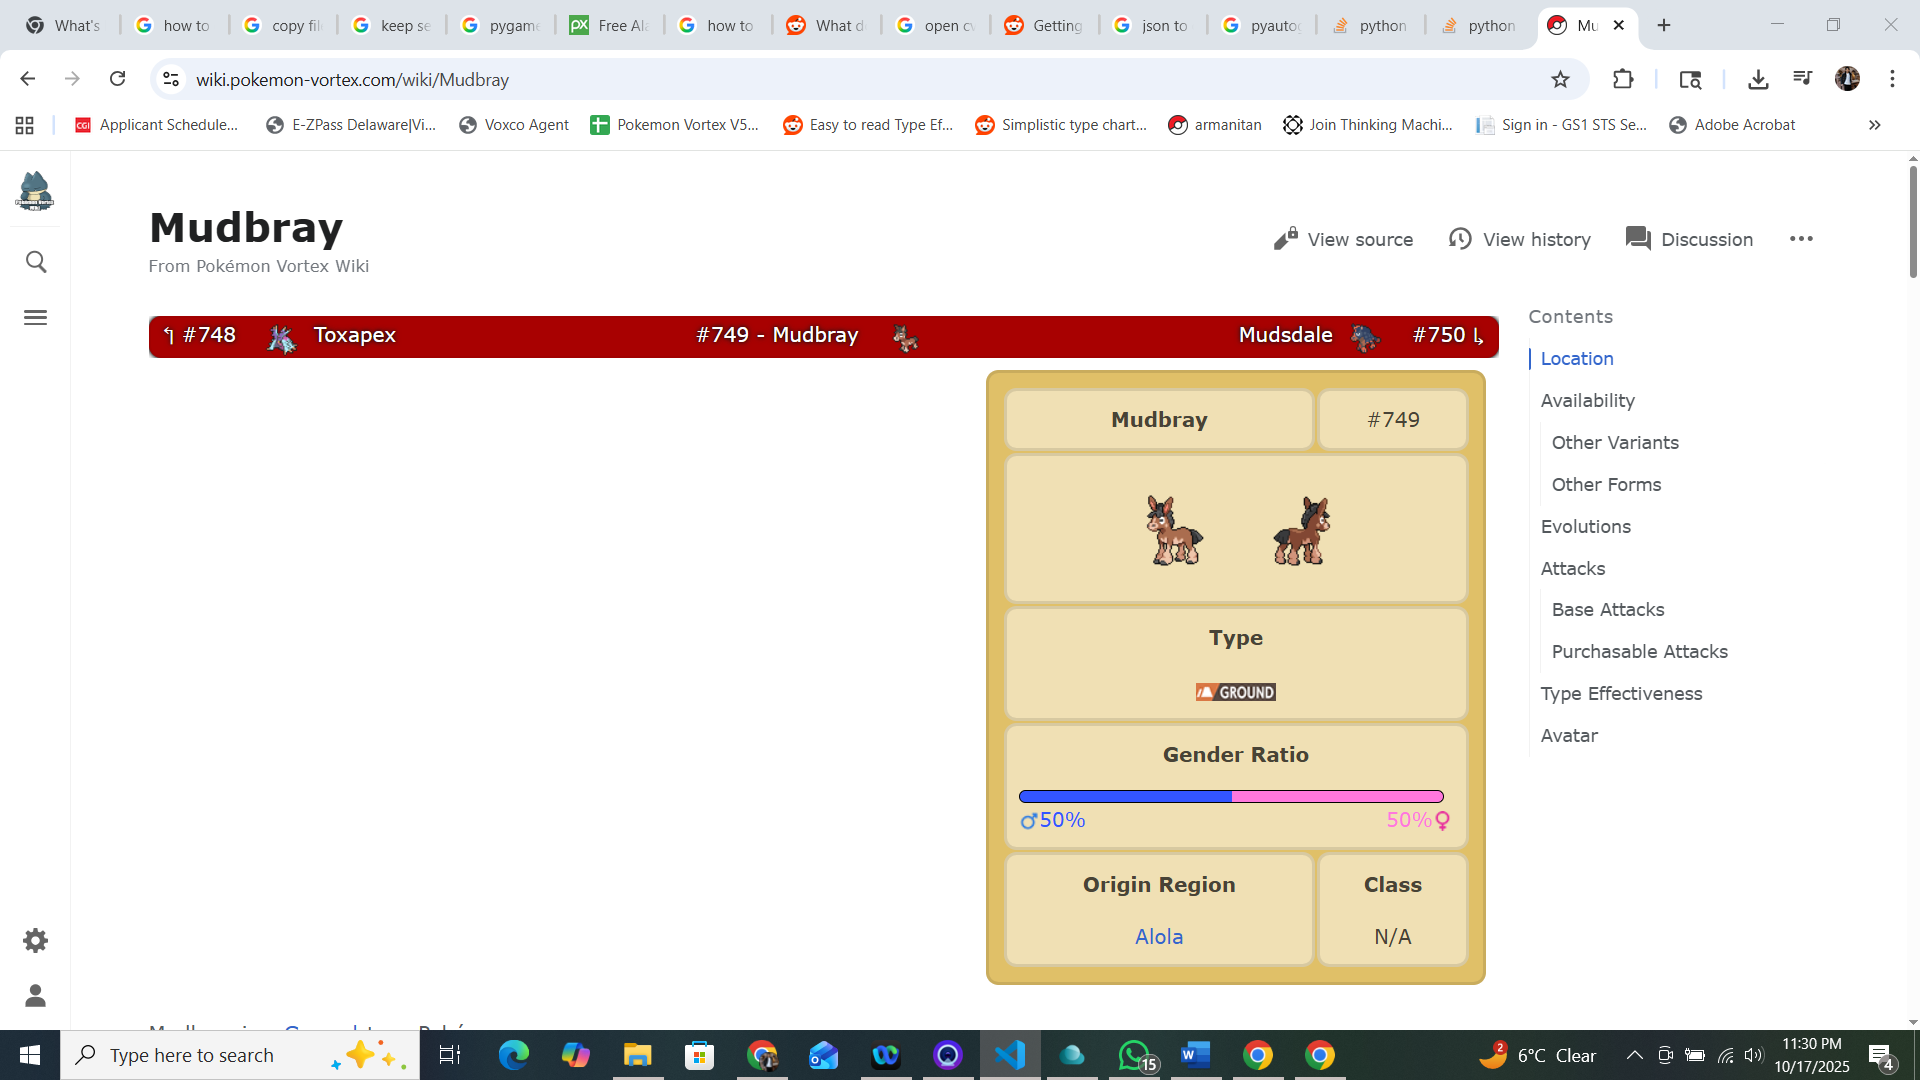

In [108]:
pyautogui.screenshot('FullScreenshot.png')

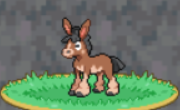

In [110]:
pyautogui.screenshot('FullScreenshot.png', region=(870, 300, 180, 110))

In [112]:
try:
    location = pyautogui.locateOnScreen(r'Pokemon Icons/Mudbray.png', grayscale=True, confidence=0.6, region=(870, 300, 180, 110))
    if location:
        print("Legendary spawn detected!")
        found = True
        print(location)
        pyautogui.moveTo(location)
except Exception as e:
    print(f"Error in detecting spawn: {e}")

Error in detecting spawn: 


In [87]:
location

In [168]:
def ping_target_pokemon_spawn(name = None):

    while True:
        try:
            location = pyautogui.locateOnScreen('pokemon_spawn.png', confidence=0.8)
            if location:
                print("Pokemon spawn detected!")
                # Additional logic to handle the spawn can be added here
        except Exception as e:
            print(f"Error in detecting spawn: {e}")

In [ ]:
def ping_legendary_spawn():
    while True:

In [ ]:
mixer.init()
legendary_alarm = mixer.music.load('Alarms/legendary.mp3')
mixer.music.play()

In [148]:
mixer.music.stop()

In [125]:
thread1 = threading.Thread(target=automate_movement)

In [126]:
thread1.start()

In [142]:
thread1.join()

In [31]:
canvas = driver.find_element(By.CSS_SELECTOR, "#mapapp > canvas")
ActionChains(driver).click(canvas).perform()
pyautogui.press('down')

In [35]:
# Move mouse to the map canvas and perform click-and-drag actions to simulate movement
action = ActionChains(driver)
action.move_to_element(canvas).perform()
action.click_and_hold().perform()
pyautogui.press('down')

In [21]:
pyautogui.press('down')

In [10]:
screen = pyautogui.screenshot('FullScreenshot.png')

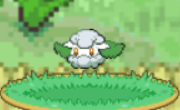

In [ ]:
pyautogui.screenshot('FullScreenshot.png', region=(870, 300, 180, 110))